# EDA: Stores Sales Predections:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("../Raw Data/Train.csv", na_values=['NA', 'No', 'NAN', 'NOT', 'nan', 'NULL', 'null', 'new'])
test = pd.read_csv("../Raw Data/Test.csv", na_values=['NA', 'No', 'NAN', 'NOT', 'nan', 'NULL', 'null', 'new'])

In [3]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [4]:
# train.isnull().sum()

In [5]:
# test.isnull().sum()

## Using train.csv data:

In [6]:
# Concatenate train & test:

data = train
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
data.shape

(8523, 12)

In [8]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
# Convert the column header in lower case:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '')

# Convert string values in lowe case:
data = data.applymap(lambda s: s.lower() if type(s) == str else s)
data = data.applymap(lambda s: s.strip() if type(s) == str else s)
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,fda15,9.30,low fat,0.016047,dairy,249.8092,out049,1999,medium,tier 1,supermarket type1,3735.1380
1,drc01,5.92,regular,0.019278,soft drinks,48.2692,out018,2009,medium,tier 3,supermarket type2,443.4228
2,fdn15,17.50,low fat,0.016760,meat,141.6180,out049,1999,medium,tier 1,supermarket type1,2097.2700
3,fdx07,19.20,regular,0.000000,fruits and vegetables,182.0950,out010,1998,NaN,tier 3,grocery store,732.3800
4,ncd19,8.93,low fat,0.000000,household,53.8614,out013,1987,high,tier 3,supermarket type1,994.7052


In [10]:
data.dtypes

item_identifier               object
item_weight                  float64
item_fat_content              object
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type          object
outlet_type                   object
item_outlet_sales            float64
dtype: object

## Data Explore:

In [11]:
# Checking unique values:

data.nunique()

item_identifier              1559
item_weight                   415
item_fat_content                4
item_visibility              7880
item_type                      16
item_mrp                     5938
outlet_identifier              10
outlet_establishment_year       9
outlet_size                     3
outlet_location_type            3
outlet_type                     4
item_outlet_sales            3493
dtype: int64

In [12]:
# getting the unique categorical values: 

for col in data.dtypes[data.dtypes == 'object'].index:
    print(f"Categories in {col}  ------>  {data[col].unique()} \n")

Categories in item_identifier  ------>  ['fda15' 'drc01' 'fdn15' ... 'ncf55' 'ncw30' 'ncw05'] 

Categories in item_fat_content  ------>  ['low fat' 'regular' 'lf' 'reg'] 

Categories in item_type  ------>  ['dairy' 'soft drinks' 'meat' 'fruits and vegetables' 'household'
 'baking goods' 'snack foods' 'frozen foods' 'breakfast'
 'health and hygiene' 'hard drinks' 'canned' 'breads' 'starchy foods'
 'others' 'seafood'] 

Categories in outlet_identifier  ------>  ['out049' 'out018' 'out010' 'out013' 'out027' 'out045' 'out017' 'out046'
 'out035' 'out019'] 

Categories in outlet_size  ------>  ['medium' nan 'high' 'small'] 

Categories in outlet_location_type  ------>  ['tier 1' 'tier 3' 'tier 2'] 

Categories in outlet_type  ------>  ['supermarket type1' 'supermarket type2' 'grocery store'
 'supermarket type3'] 



## Handling Null values or Missing Values:

In [13]:
# Check null values present or not:

data.isnull().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [14]:
# extract mean, meadian, mode & std of those columns where missing values are present:

ms_col = {
    "item_weight":{
        "mean": data['item_weight'].mean(), 
        'median': data['item_weight'].median(), 
        'mode': data['item_weight'].mode()[0], 
        'std': data['item_weight'].std()
    },
    "outlet_size":{
        "mean": np.nan, 
        'median': np.nan, 
        'mode': data['outlet_size'].mode()[0], 
        'std': np.nan
    },
#     "item_outlet_sales":{
#         "mean": data['item_outlet_sales'].mean(), 
#         'median': data['item_outlet_sales'].median(), 
#         'mode': data['item_outlet_sales'].mode()[0], 
#         'std': data['item_outlet_sales'].std()
#     }
}

pd.DataFrame(ms_col)

,item_weight,outlet_size
mean,12.857645,NaN
median,12.600000,NaN
mode,12.150000,medium
std,4.643456,NaN


In [15]:
# Handle the Missing Values: replace with mean for neumerical data & mode for categorical data.

data['item_weight_mean'] = data['item_weight'].fillna(data['item_weight'].mean())
# data['item_outlet_sales_mean'] = data['item_outlet_sales'].fillna(data['item_outlet_sales'].mean())
data['outlet_size_mode'] = data['outlet_size'].fillna(data['outlet_size'].mode()[0])

In [16]:
data.isnull().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
item_weight_mean                0
outlet_size_mode                0
dtype: int64

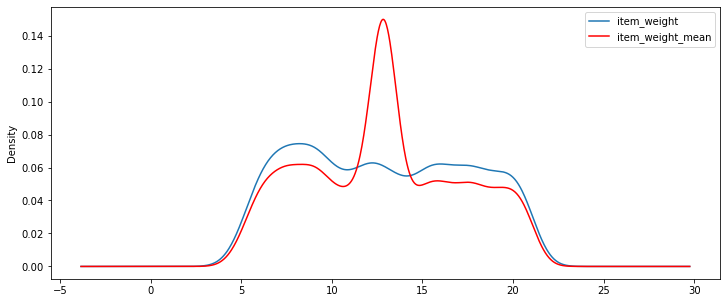

In [17]:
# Check distribution after and before handle missing values for neumerical features: (item_weight & item_weight_mean)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
data['item_weight'].plot(kind='kde', ax=ax)
data['item_weight_mean'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [18]:
# drop the columns: item_weight & outlet_size

data.drop(columns=['item_weight', 'outlet_size'], axis=1, inplace=True)

In [19]:
# Check distribution after and before handle missing values for neumerical features: 
# (item_outlet_sales & item_outlet_sales_mean)

# fig = plt.figure(figsize=(12,5))
# ax = fig.add_subplot(111)
# data['item_outlet_sales'].plot(kind='kde', ax=ax)
# data['item_outlet_sales_mean'].plot(kind='kde', ax=ax, color='red')
# lines, labels = ax.get_legend_handles_labels()
# ax.legend(lines, labels, loc='best')
# plt.show()

In [20]:
# find if there are any zero value present of not: (output: getting the indexes)

zero_item_weight_mean = np.where(data['item_weight_mean'] == 0)
zero_item_visibility = np.where(data['item_visibility'] == 0)
zero_item_mrp = np.where(data['item_mrp'] == 0)
zero_outlet_establishment_year = np.where(data['outlet_establishment_year'] == 0)
zero_item_outlet_sales = np.where(data['item_outlet_sales'] == 0)


zero_index = {
    'item_weight': len(zero_item_weight_mean[0]) > 0,
    'item_visibility': len(zero_item_visibility[0]) > 0,
    'item_mrp': len(zero_item_mrp[0]) > 0,
    'outlet_establishment_year': len(zero_outlet_establishment_year[0]) > 0,
    'item_outlet_sales': len(zero_item_outlet_sales[0]) > 0
}

pd.Series(zero_index)

item_weight                  False
item_visibility               True
item_mrp                     False
outlet_establishment_year    False
item_outlet_sales            False
dtype: bool

## Handle the Duplicate values:

In [21]:
# Finding the duplicated:

# data.duplicated(keep=False).sum()
# data.loc[data.duplicated(keep=False), :]

data.drop_duplicates(inplace=True)

In [22]:
data.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

In [23]:
data.item_visibility.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: item_visibility, Length: 8523, dtype: bool

## Find the Outliers:

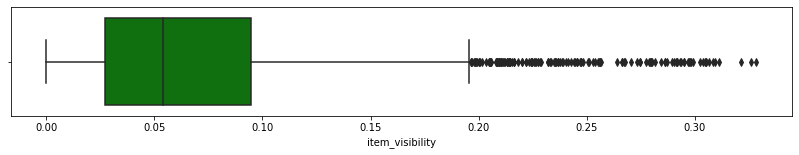

In [24]:
# for item_visibility feature:

plt.figure(figsize=(14,2))
sns.boxplot(data=data, x="item_visibility", color='green')
plt.show()

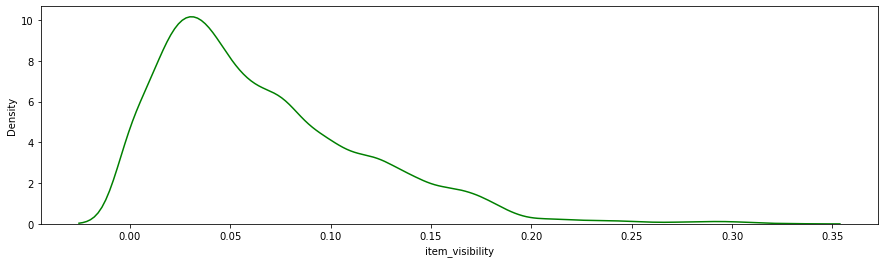

In [25]:
# for item_visibility featre:

plt.figure(figsize=(15,4))
sns.kdeplot(data["item_visibility"], color='green')
plt.show()

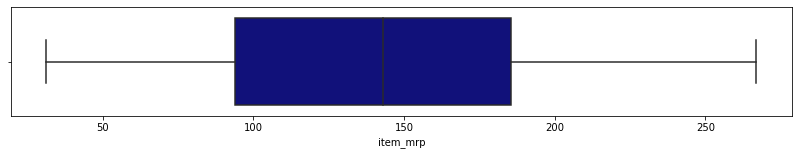

In [26]:
# for item_mrp feature:

plt.figure(figsize=(14,2))
sns.boxplot(data=data, x="item_mrp", color='darkblue')
plt.show()

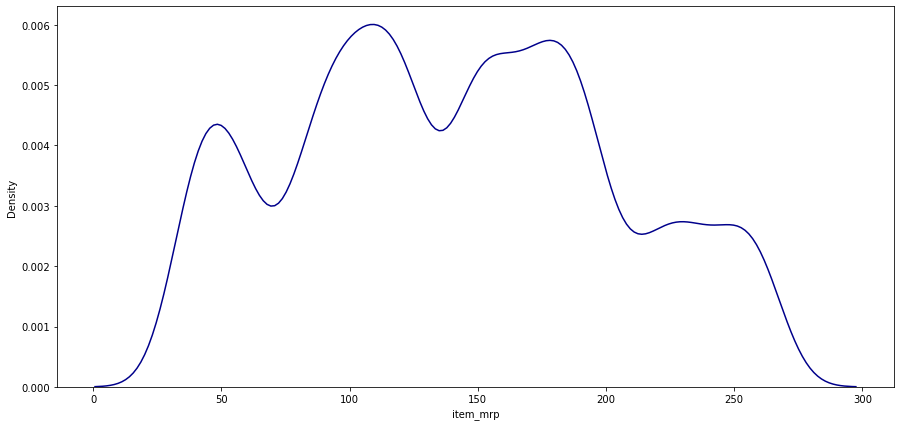

In [27]:
# for item_mrp feature:

plt.figure(figsize=(15,7))
sns.kdeplot(data=data, x="item_mrp", color='darkblue')
plt.show()

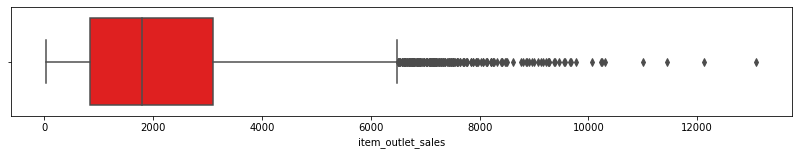

In [28]:
# for item_outlet_sales feature:

plt.figure(figsize=(14,2))
sns.boxplot(data=data, x="item_outlet_sales", color='red')
plt.show()

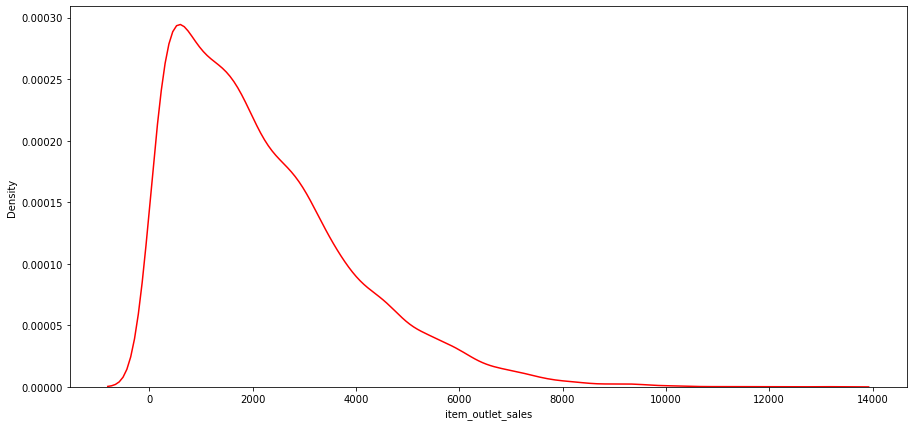

In [29]:
# for item_outlet_sales feature:

plt.figure(figsize=(15,7))
sns.kdeplot(data=data, x="item_outlet_sales", color='red')
plt.show()

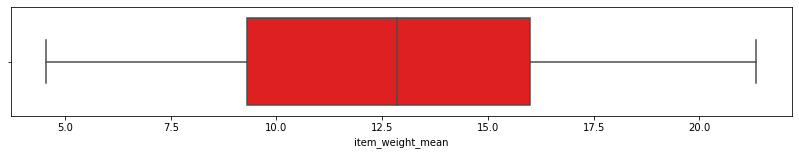

In [30]:
# for item_weight_mean feature:

plt.figure(figsize=(14,2))
sns.boxplot(data=data, x="item_weight_mean", color='red')
plt.show()

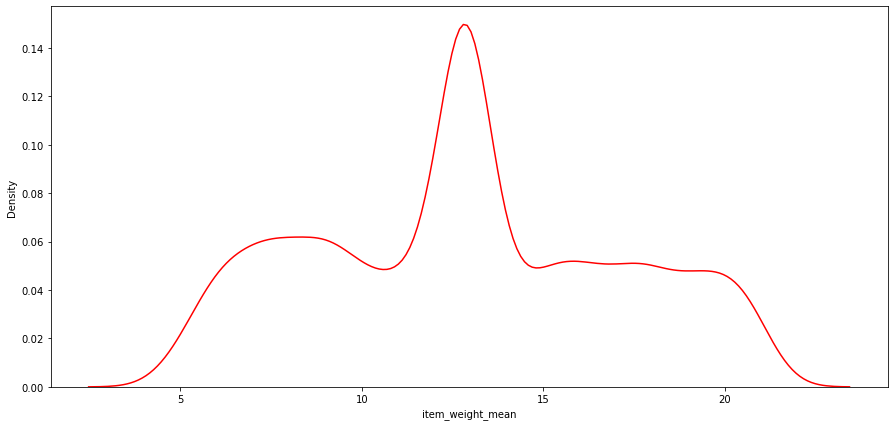

In [31]:
# for item_outlet_sales feature:

plt.figure(figsize=(15,7))
sns.kdeplot(data=data, x="item_weight_mean", color='red')
plt.show()

## Univariate Analysis:

### For Categorical data:

In [32]:
data.head(3)

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales,item_weight_mean,outlet_size_mode
0,fda15,low fat,0.016047,dairy,249.8092,out049,1999,tier 1,supermarket type1,3735.1380,9.30,medium
1,drc01,regular,0.019278,soft drinks,48.2692,out018,2009,tier 3,supermarket type2,443.4228,5.92,medium
2,fdn15,low fat,0.016760,meat,141.6180,out049,1999,tier 1,supermarket type1,2097.2700,17.50,medium


In [33]:
# replace the values:

data['item_fat_content'] = data['item_fat_content'].replace('lf', 'low fat')
data['item_fat_content'] = data['item_fat_content'].replace('reg', 'regular')

data['outlet_type'] = data['outlet_type'].replace('supermarket type1', 'supermarket')
data['outlet_type'] = data['outlet_type'].replace('supermarket type2', 'supermarket')
data['outlet_type'] = data['outlet_type'].replace('supermarket type3', 'supermarket')

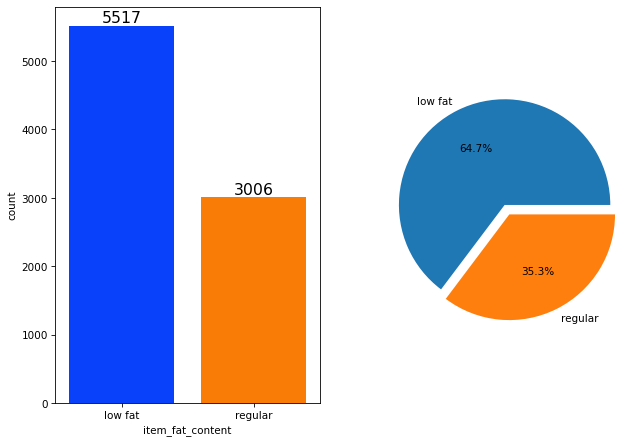

In [34]:
# Categorical feature: item_fat_content:

f, ax = plt.subplots(1,2, figsize=(10,7), dpi=75)
sns.countplot(x=data['item_fat_content'], data=data, palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)
    
plt.pie(x=data['item_fat_content'].value_counts(),labels=['low fat', 'regular'],explode=[0,0.1],autopct='%1.1f%%')
plt.show()

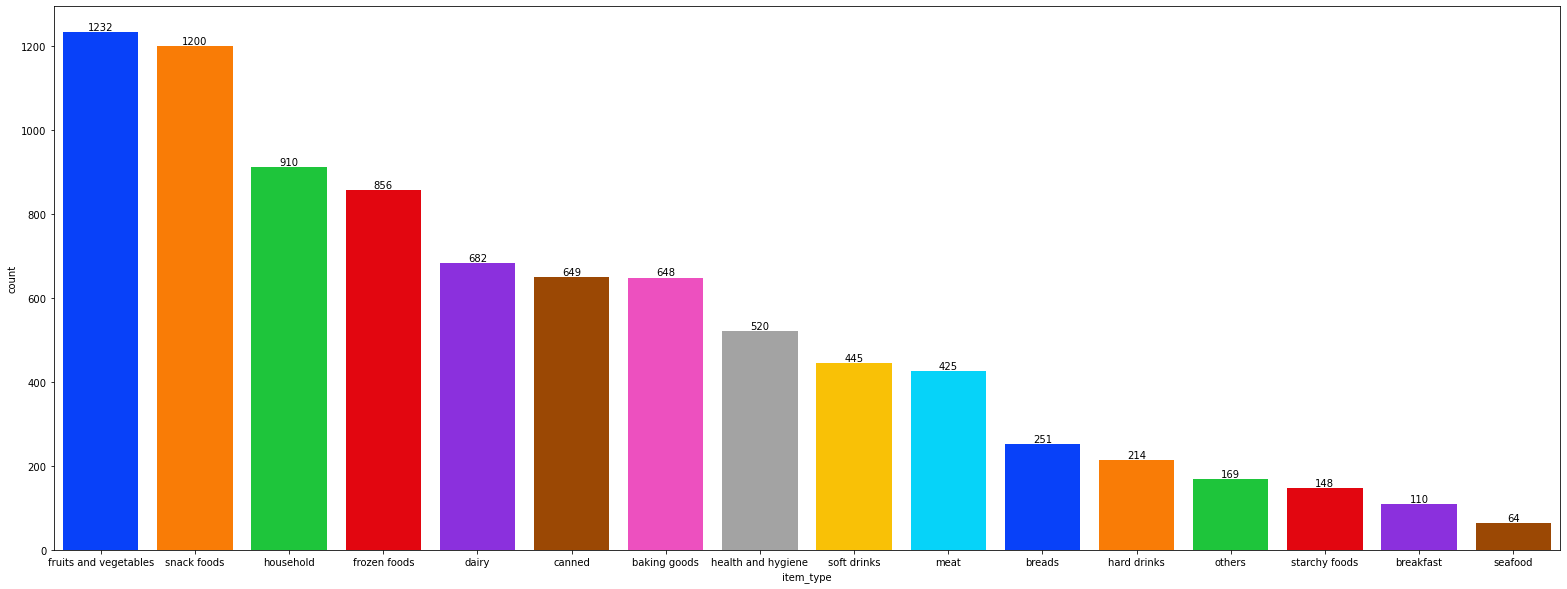

In [35]:
# Categorical feature: item_type:


plt.figure(figsize=(27,10))
ax = sns.countplot(x=data['item_type'], data=data, order=data['item_type'].value_counts(ascending=False).index,
              palette='bright', saturation=0.95)

abs_values = data['item_type'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

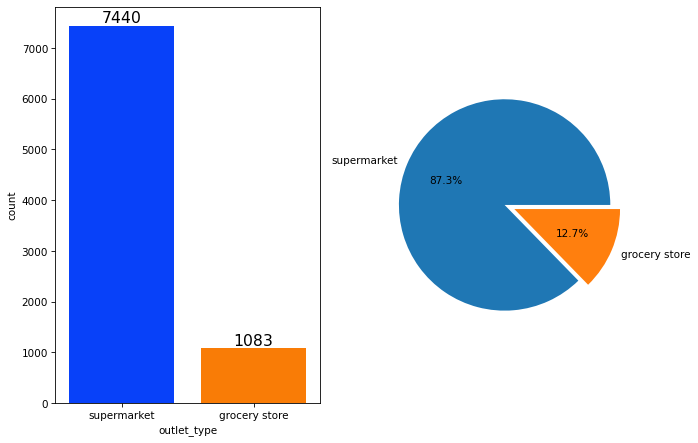

In [36]:
# Categorical feature: outlet_type:


f, ax = plt.subplots(1,2, figsize=(10,7), dpi=75)
sns.countplot(x=data['outlet_type'], data=data, palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)
    
plt.pie(x=data['outlet_type'].value_counts(),labels=['supermarket', 'grocery store'],explode=[0,0.1],autopct='%1.1f%%')
plt.show()

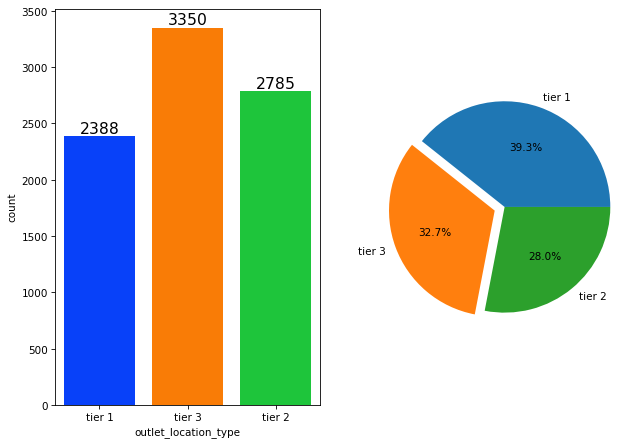

In [37]:
# Categorical feature: outlet_location_type:


f, ax = plt.subplots(1,2, figsize=(10,7), dpi=75)
sns.countplot(x=data['outlet_location_type'], data=data, palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)
    
plt.pie(x=data['outlet_location_type'].value_counts(),labels=['tier 1', 'tier 3', 'tier 2'],explode=[0,0.1,0],autopct='%1.1f%%')
plt.show()

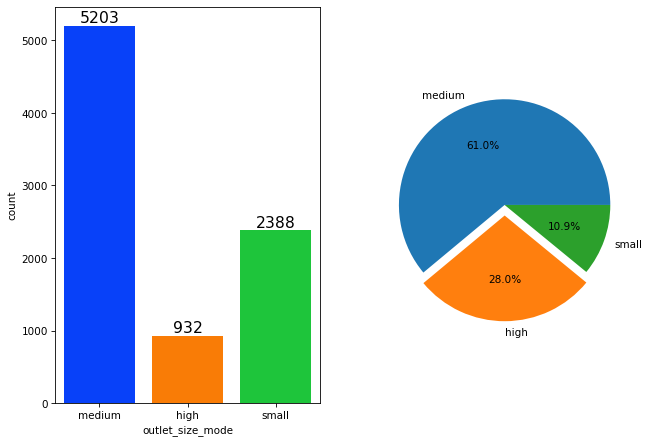

In [38]:
# Categorical feature: outlet_size_mode:


f, ax = plt.subplots(1,2, figsize=(10,7), dpi=75)
sns.countplot(x=data['outlet_size_mode'], data=data, palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)
    
plt.pie(x=data['outlet_size_mode'].value_counts(),labels=['medium', 'high', 'small'],explode=[0,0.1,0],autopct='%1.1f%%')
plt.show()

### For Neumerical data:

In [39]:
data.head(3)

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales,item_weight_mean,outlet_size_mode
0,fda15,low fat,0.016047,dairy,249.8092,out049,1999,tier 1,supermarket,3735.1380,9.30,medium
1,drc01,regular,0.019278,soft drinks,48.2692,out018,2009,tier 3,supermarket,443.4228,5.92,medium
2,fdn15,low fat,0.016760,meat,141.6180,out049,1999,tier 1,supermarket,2097.2700,17.50,medium


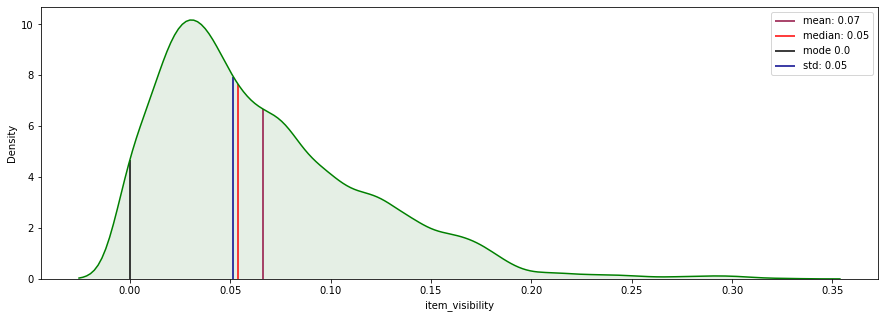

In [40]:
# for item_visibility featre:

plt.figure(figsize=(15,5))
ax = sns.kdeplot(data=data, x="item_visibility", shade=False, color='green')


kdeline = ax.lines[0]
mean = data['item_visibility'].mean()
median = data['item_visibility'].median()
mode = data['item_visibility'].mode()[0]
std = data['item_visibility'].std()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

# mean:
height_mean = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height_mean, color='#900C3F', ls='-', label=f"mean: {round(mean,2)}")

# median:
height_median = np.interp(median, xs, ys)
ax.vlines(median, 0, height_median, color='red', ls='-', label=f"median: {round(median,2)}")

# mode:
height_mode = np.interp(mode, xs, ys)
ax.vlines(mode, 0, height_mode, color='black', ls='-', label=f"mode {round(mode,2)}")

# standard deviation:
height_std = np.interp(std, xs, ys)
ax.vlines(std, 0, height_std, color='darkblue', ls='-', label=f"std: {round(std,2)}")

ax.legend()
ax.fill_between(xs, 0, ys, facecolor='darkgreen', alpha=0.1)
plt.show()

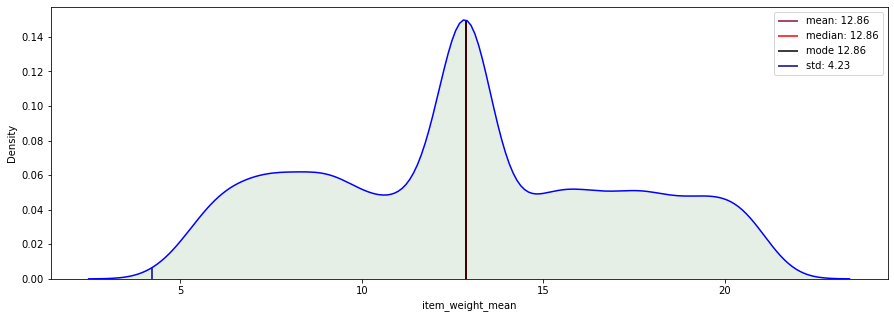

In [41]:
# for item_weight_mean feature:

plt.figure(figsize=(15,5))
ax = sns.kdeplot(data=data, x="item_weight_mean", color='blue')


kdeline = ax.lines[0]
mean = data['item_weight_mean'].mean()
median = data['item_weight_mean'].median()
mode = data['item_weight_mean'].mode()[0]
std = data['item_weight_mean'].std()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

# mean:
height_mean = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height_mean, color='#900C3F', ls='-', label=f"mean: {round(mean,2)}")

# median:
height_median = np.interp(median, xs, ys)
ax.vlines(median, 0, height_median, color='red', ls='-', label=f"median: {round(median,2)}")

# mode:
height_mode = np.interp(mode, xs, ys)
ax.vlines(mode, 0, height_mode, color='black', ls='-', label=f"mode {round(mode,2)}")

# standard deviation:
height_std = np.interp(std, xs, ys)
ax.vlines(std, 0, height_std, color='darkblue', ls='-', label=f"std: {round(std,2)}")

ax.legend()
ax.fill_between(xs, 0, ys, facecolor='darkgreen', alpha=0.1)
plt.show()

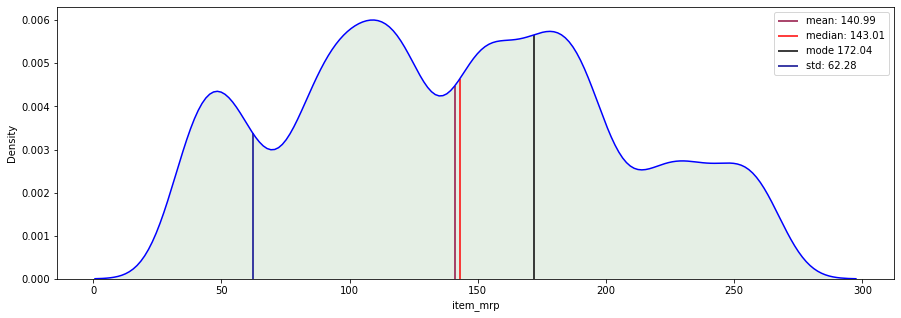

In [42]:
# for item_mrp feature:

plt.figure(figsize=(15,5))
ax = sns.kdeplot(data=data, x="item_mrp", color='blue')


kdeline = ax.lines[0]
mean = data['item_mrp'].mean()
median = data['item_mrp'].median()
mode = data['item_mrp'].mode()[0]
std = data['item_mrp'].std()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

# mean:
height_mean = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height_mean, color='#900C3F', ls='-', label=f"mean: {round(mean,2)}")

# median:
height_median = np.interp(median, xs, ys)
ax.vlines(median, 0, height_median, color='red', ls='-', label=f"median: {round(median,2)}")

# mode:
height_mode = np.interp(mode, xs, ys)
ax.vlines(mode, 0, height_mode, color='black', ls='-', label=f"mode {round(mode,2)}")

# standard deviation:
height_std = np.interp(std, xs, ys)
ax.vlines(std, 0, height_std, color='darkblue', ls='-', label=f"std: {round(std,2)}")

ax.legend()
ax.fill_between(xs, 0, ys, facecolor='darkgreen', alpha=0.1)
plt.show()

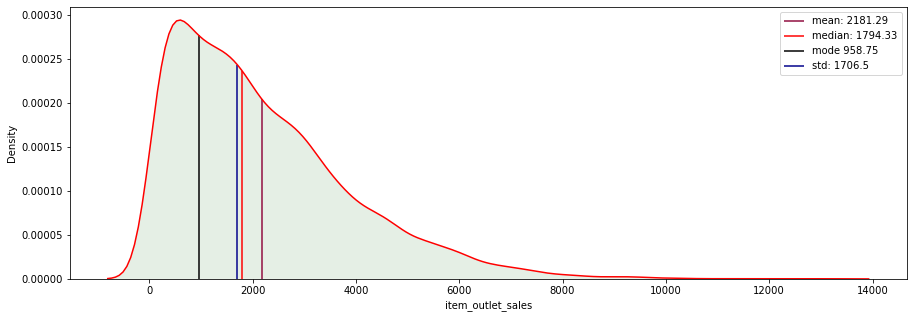

In [43]:
# for item_outlet_sales feature:

plt.figure(figsize=(15,5))
ax = sns.kdeplot(data=data, x="item_outlet_sales", color='red')


kdeline = ax.lines[0]
mean = data['item_outlet_sales'].mean()
median = data['item_outlet_sales'].median()
mode = data['item_outlet_sales'].mode()[0]
std = data['item_outlet_sales'].std()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

# mean:
height_mean = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height_mean, color='#900C3F', ls='-', label=f"mean: {round(mean,2)}")

# median:
height_median = np.interp(median, xs, ys)
ax.vlines(median, 0, height_median, color='red', ls='-', label=f"median: {round(median,2)}")

# mode:
height_mode = np.interp(mode, xs, ys)
ax.vlines(mode, 0, height_mode, color='black', ls='-', label=f"mode {round(mode,2)}")

# standard deviation:
height_std = np.interp(std, xs, ys)
ax.vlines(std, 0, height_std, color='darkblue', ls='-', label=f"std: {round(std,2)}")

ax.legend()
ax.fill_between(xs, 0, ys, facecolor='darkgreen', alpha=0.1)
plt.show()

## Bivariate Analysis:

### Finding Relationship between Independent & Dependent variables:

In [44]:
data.head()

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales,item_weight_mean,outlet_size_mode
0,fda15,low fat,0.016047,dairy,249.8092,out049,1999,tier 1,supermarket,3735.1380,9.30,medium
1,drc01,regular,0.019278,soft drinks,48.2692,out018,2009,tier 3,supermarket,443.4228,5.92,medium
2,fdn15,low fat,0.016760,meat,141.6180,out049,1999,tier 1,supermarket,2097.2700,17.50,medium
3,fdx07,regular,0.000000,fruits and vegetables,182.0950,out010,1998,tier 3,grocery store,732.3800,19.20,medium
4,ncd19,low fat,0.000000,household,53.8614,out013,1987,tier 3,supermarket,994.7052,8.93,high


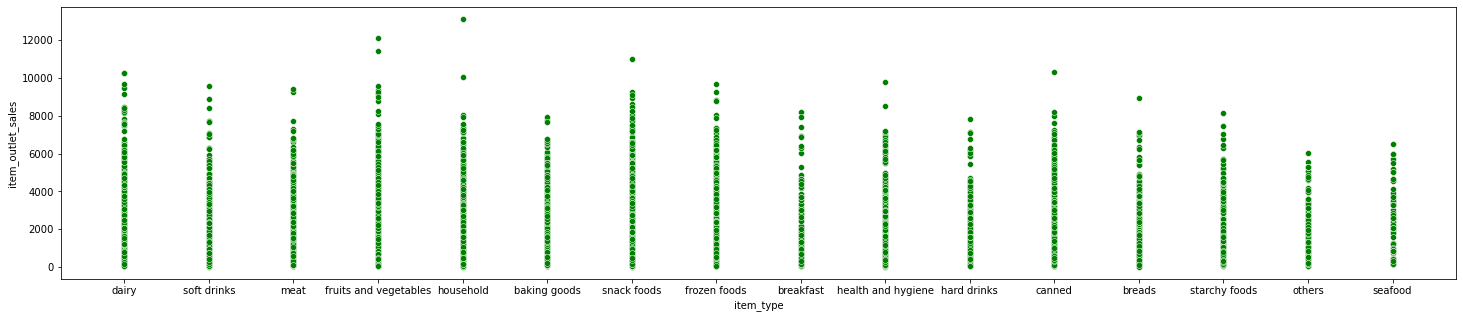

In [45]:
# item_type vs item_outlet_sales:

plt.figure(figsize=(25,5))
sns.scatterplot(data=data, x="item_type", y="item_outlet_sales", color='green')
plt.show()

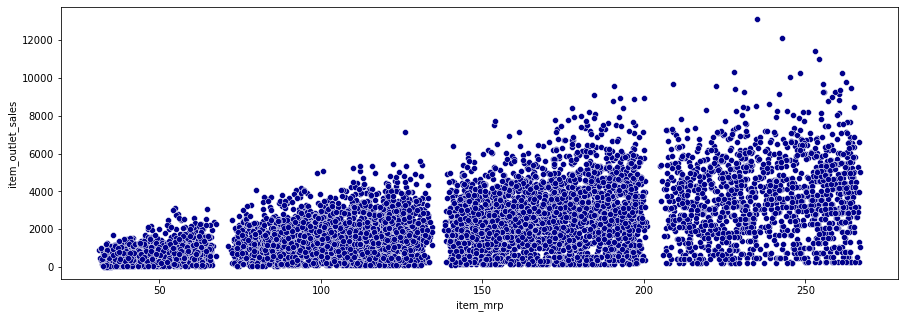

In [46]:
# item_mrp vs item_outlet_sales:

plt.figure(figsize=(15,5))
sns.scatterplot(data=data, x="item_mrp", y="item_outlet_sales", color='darkblue')
plt.show()

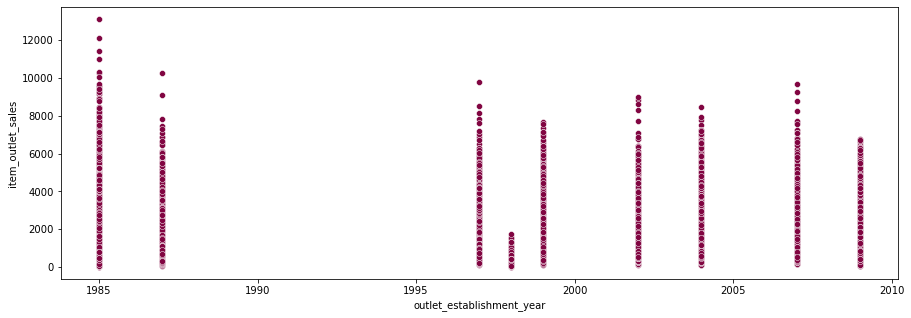

In [47]:
# outlet_establishment_year vs item_outlet_sales

plt.figure(figsize=(15,5))
sns.scatterplot(data=data, x="outlet_establishment_year", y="item_outlet_sales", color="#810541")
plt.show()

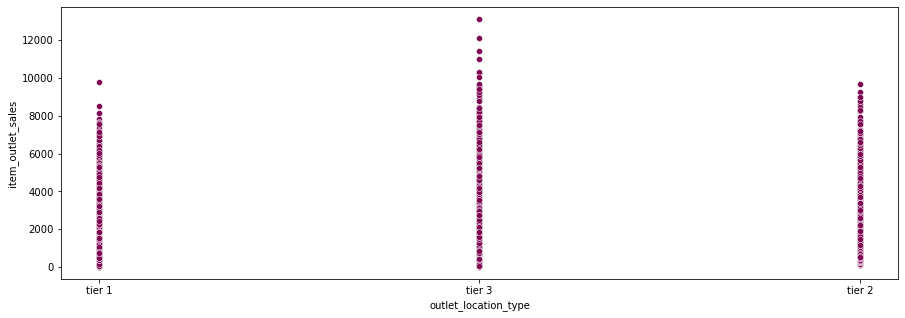

In [48]:
# outlet_location_type vs item_outlet_sales:

plt.figure(figsize=(15,5))
sns.scatterplot(data=data, x="outlet_location_type", y="item_outlet_sales", color="#7D0552")
plt.show()

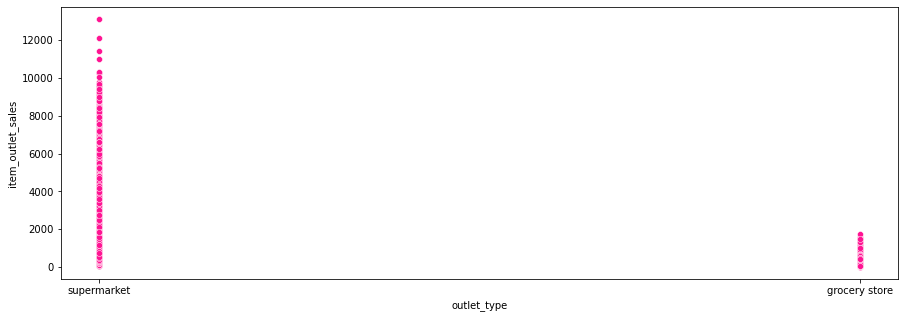

In [49]:
# outlet_type vs item_outlet_sales:

plt.figure(figsize=(15,5))
sns.scatterplot(data=data, x="outlet_type", y="item_outlet_sales", color="#FF1493")
plt.show()

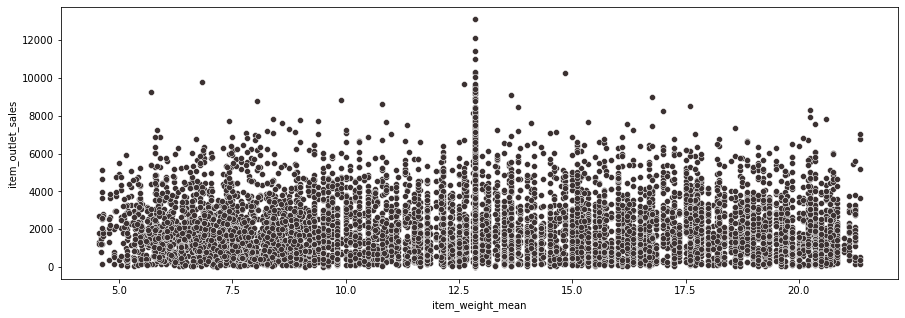

In [50]:
# item_weight_mean vs item_outlet_sales:

plt.figure(figsize=(15,5))
sns.scatterplot(data=data, x="item_weight_mean", y="item_outlet_sales", color="#3B3131")
plt.show()

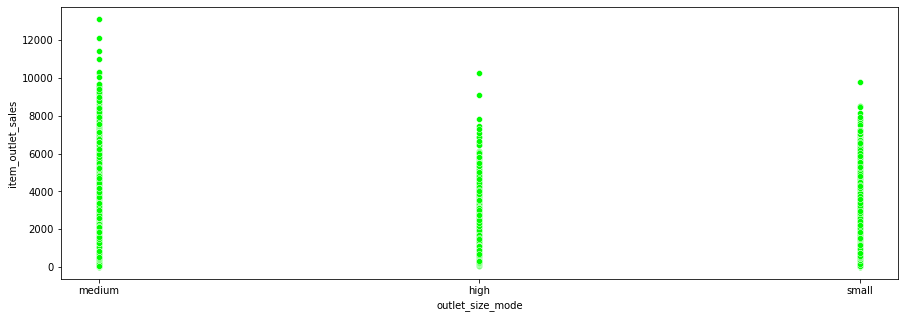

In [51]:
# outlet_size_mode vs item_outlet_sales:

plt.figure(figsize=(15,5))
sns.scatterplot(data=data, x="outlet_size_mode", y="item_outlet_sales", color="#00FF00")
plt.show()

### Find range of data:

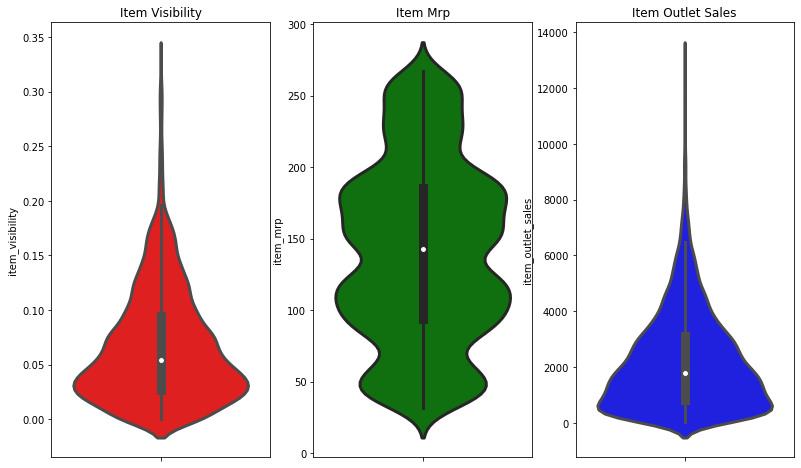

In [52]:
# Finding the data distribution of variables: item_visibility, item_mrp, item_outlet_sales

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Item Visibility')
sns.violinplot(y='item_visibility', data=data, color='red', linewidth=3)

plt.subplot(1, 4, 2)
plt.title('Item Mrp')
sns.violinplot(y='item_mrp', data=data, color='green', linewidth=3)

plt.subplot(1, 4, 3)
plt.title('Item Outlet Sales')
sns.violinplot(y='item_outlet_sales', data=data, color='blue', linewidth=3)
plt.show()

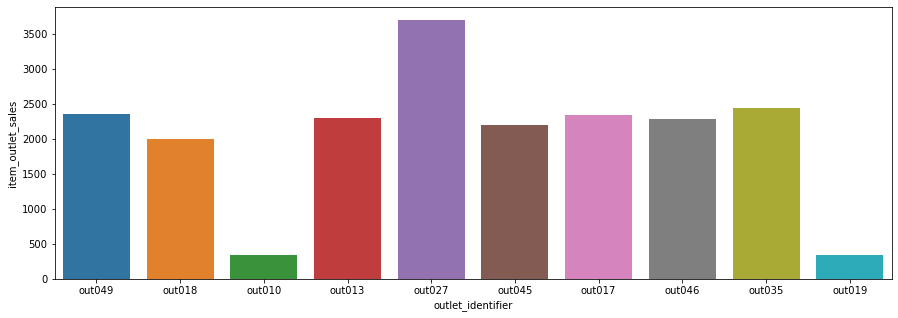

In [53]:
# outlet_identifier vs item_outlet_sales:

plt.figure(figsize=(15,5))
sns.barplot(data=data, x='outlet_identifier', y='item_outlet_sales', ci=0)
plt.show()

## Multivariate Analysis:

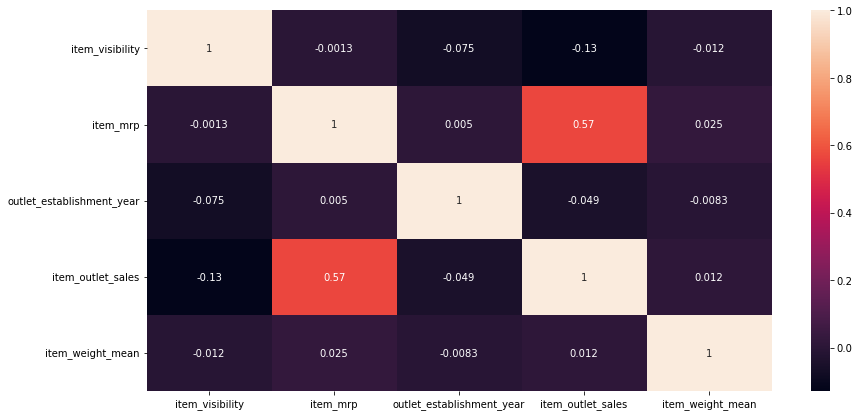

In [54]:
# Finding Correlation:

plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [55]:
df = data[['item_fat_content', 'item_visibility', 'item_type', 'item_mrp', 'outlet_type', 'outlet_location_type', 
           'item_weight_mean', 'outlet_size_mode', 'item_outlet_sales']]
df.head(3)

,item_fat_content,item_visibility,item_type,item_mrp,outlet_type,outlet_location_type,item_weight_mean,outlet_size_mode,item_outlet_sales
0,low fat,0.016047,dairy,249.8092,supermarket,tier 1,9.30,medium,3735.1380
1,regular,0.019278,soft drinks,48.2692,supermarket,tier 3,5.92,medium,443.4228
2,low fat,0.016760,meat,141.6180,supermarket,tier 1,17.50,medium,2097.2700


In [56]:
df.shape, data.shape

((8523, 9), (8523, 12))

In [57]:
# svae the train data as a "new_train.csv"

df.to_csv("../Raw Data/new_train_.csv", sep=',')

## Conclusion:

* Replace the missing values with mean in **item_weight** feature and mode in **outlet_size**.

* Large number of items are belong **low fat** category, i.e. 67%.

* Fruits and Vegetables, Snaks, Household, Frozen Food, etc. items are sold mostly from outlets.

* Almost **87%** outlets are **Supermarket** and **13%** are **Grocery Store**.

* Most of the outlets are in **Tier 1** cities, i.e. almost 40%.

* 61% outlets are in **medium** size.

* Maximum items are sold from outlet 27, i.e. **out027**.

* Outliers are present in item_visibility, item_outlet_sales.

* In **item_visibility** feature, maximum data present in 0 to 0.10, means maximum visibility is 0% to 10%.

* In **item_mrp** feature, maximum data range is 50 to 200.

* In **item_outlet_sales** feature, data range in between 800 to 4200.

* Thre is no strong linear relationship between independent & dependent features.

* Correlation between the variables are very very less. So, features are independent to each other.

* item_fat_content, item_visibility, item_type, item_mrp, outlet_type, outlet_location_type, item_weight_mean, outlet_size_mode, item_outlet_sales features are important according to EDA.

## For test data set:

Perform some pre-processing after analyzie train data

In [58]:
test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [59]:
# Now handle the test data:

# Convert the column header in lower case:
test.columns = test.columns.str.lower()
test.columns = test.columns.str.replace(' ', '')

# Convert string values in lowe case:
test = test.applymap(lambda s: s.lower() if type(s) == str else s)
test = test.applymap(lambda s: s.strip() if type(s) == str else s)
# test.head()

In [60]:
# Handle the missing values in test.csv data:

# Handle the Missing Values: replace with mean for neumerical data & mode for categorical data.

test['item_weight_mean'] = test['item_weight'].fillna(test['item_weight'].mean())
test['outlet_size_mode'] = test['outlet_size'].fillna(test['outlet_size'].mode()[0])

In [61]:
test.drop(columns=['item_weight', 'outlet_size'], axis=1, inplace=True)

In [62]:
# replace the values:

test['item_fat_content'] = test['item_fat_content'].replace('lf', 'low fat')
test['item_fat_content'] = test['item_fat_content'].replace('reg', 'regular')

test['outlet_type'] = test['outlet_type'].replace('supermarket type1', 'supermarket')
test['outlet_type'] = test['outlet_type'].replace('supermarket type2', 'supermarket')
test['outlet_type'] = test['outlet_type'].replace('supermarket type3', 'supermarket')

In [63]:
df2 = test[['item_fat_content', 'item_visibility', 'item_type', 'item_mrp', 'outlet_type', 'outlet_location_type', 
           'item_weight_mean', 'outlet_size_mode']]
df2.head(3)

,item_fat_content,item_visibility,item_type,item_mrp,outlet_type,outlet_location_type,item_weight_mean,outlet_size_mode
0,low fat,0.007565,snack foods,107.8622,supermarket,tier 1,20.75,medium
1,regular,0.038428,dairy,87.3198,supermarket,tier 2,8.30,medium
2,low fat,0.099575,others,241.7538,grocery store,tier 3,14.60,medium


In [64]:
df2.to_csv("../Raw Data/new_test_.csv", sep=',')

In [65]:
# for col in df.dtypes[df.dtypes == 'object'].index:
#     print(f"Categories in {col}  ------>  {df[col].unique()} \n")

In [66]:
# for col in df2.dtypes[df2.dtypes == 'object'].index:
#     print(f"Categories in {col}  ------>  {df2[col].unique()} \n")